## Paso 1: Carga del conjunto de datos

In [1]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv('C:\\Users\\Jaime\\Desktop\\EUROPEAN MARKET COLLEGE\\clase1-minado\\NATALIDAD\\natalidad.csv')
dataframe

,Fecha,Nacidos,Nacidos - Hombres,Nacidas - Mujeres
0,2022,502,248.0,254.0
1,2021,503,257.0,246.0
2,2020,539,266.0,273.0
3,2019,539,264.0,275.0
4,2018,543,293.0,250.0
...,...,...,...,...
65,1957,111,NaN,NaN
66,1956,110,NaN,NaN
67,1955,108,NaN,NaN
68,1954,96,NaN,NaN


In [2]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

[]
['Fecha', 'Nacidos', 'Nacidos - Hombres', 'Nacidas - Mujeres']


## Paso 2: Realiza un EDA completo

In [3]:
# Obtener las dimensiones
dataframe.shape

(70, 4)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha              70 non-null     int64  
 1   Nacidos            70 non-null     int64  
 2   Nacidos - Hombres  46 non-null     float64
 3   Nacidas - Mujeres  46 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.3 KB


In [5]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [6]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

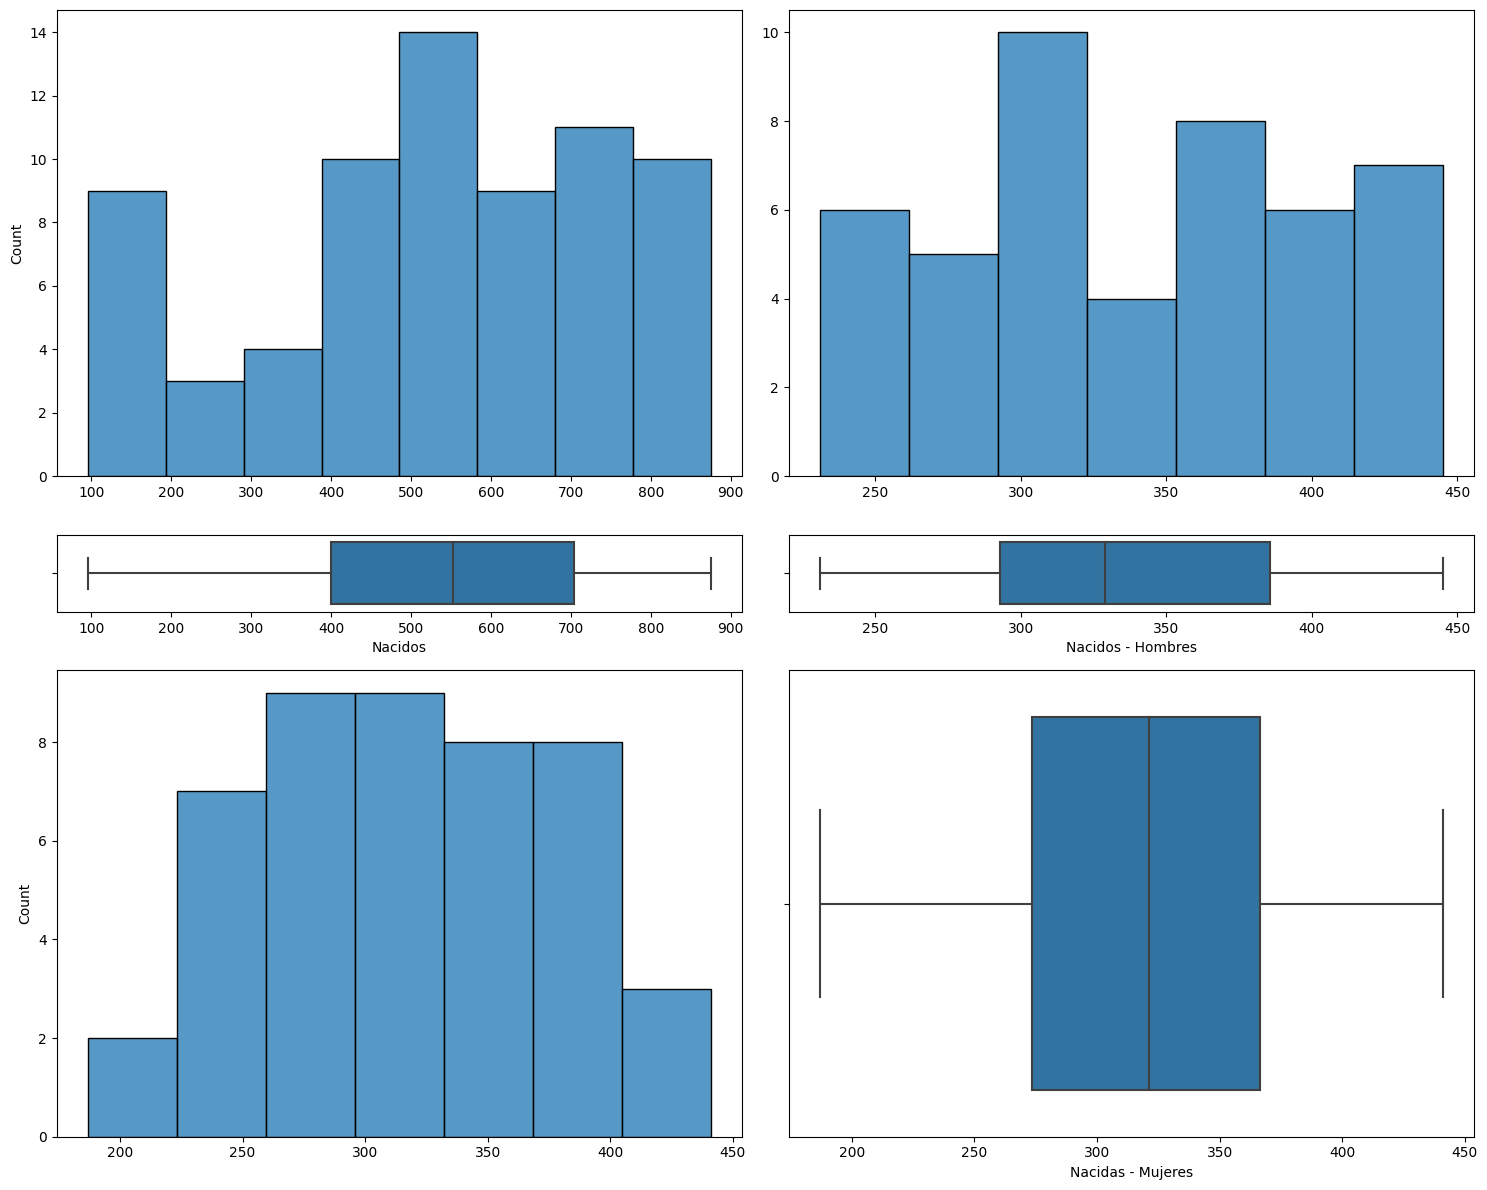

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Supongamos que tu DataFrame se llama df

fig, axis = plt.subplots(3, 2, figsize=(15, 12), gridspec_kw={'height_ratios': [6, 1, 6]})

# Histograma e diagrama de caja para 'Muertes'
sns.histplot(ax=axis[0, 0], data=dataframe, x='Nacidos').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=dataframe, x='Nacidos')

# Histograma e diagrama de caja para 'Muertes - Hombres'
sns.histplot(ax=axis[0, 1], data=dataframe, x='Nacidos - Hombres').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=dataframe, x='Nacidos - Hombres')

# Histograma e diagrama de caja para 'Muertes - Mujeres'
sns.histplot(ax=axis[2, 0], data=dataframe, x='Nacidas - Mujeres').set(xlabel=None)
sns.boxplot(ax=axis[2, 1], data=dataframe, x='Nacidas - Mujeres')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()


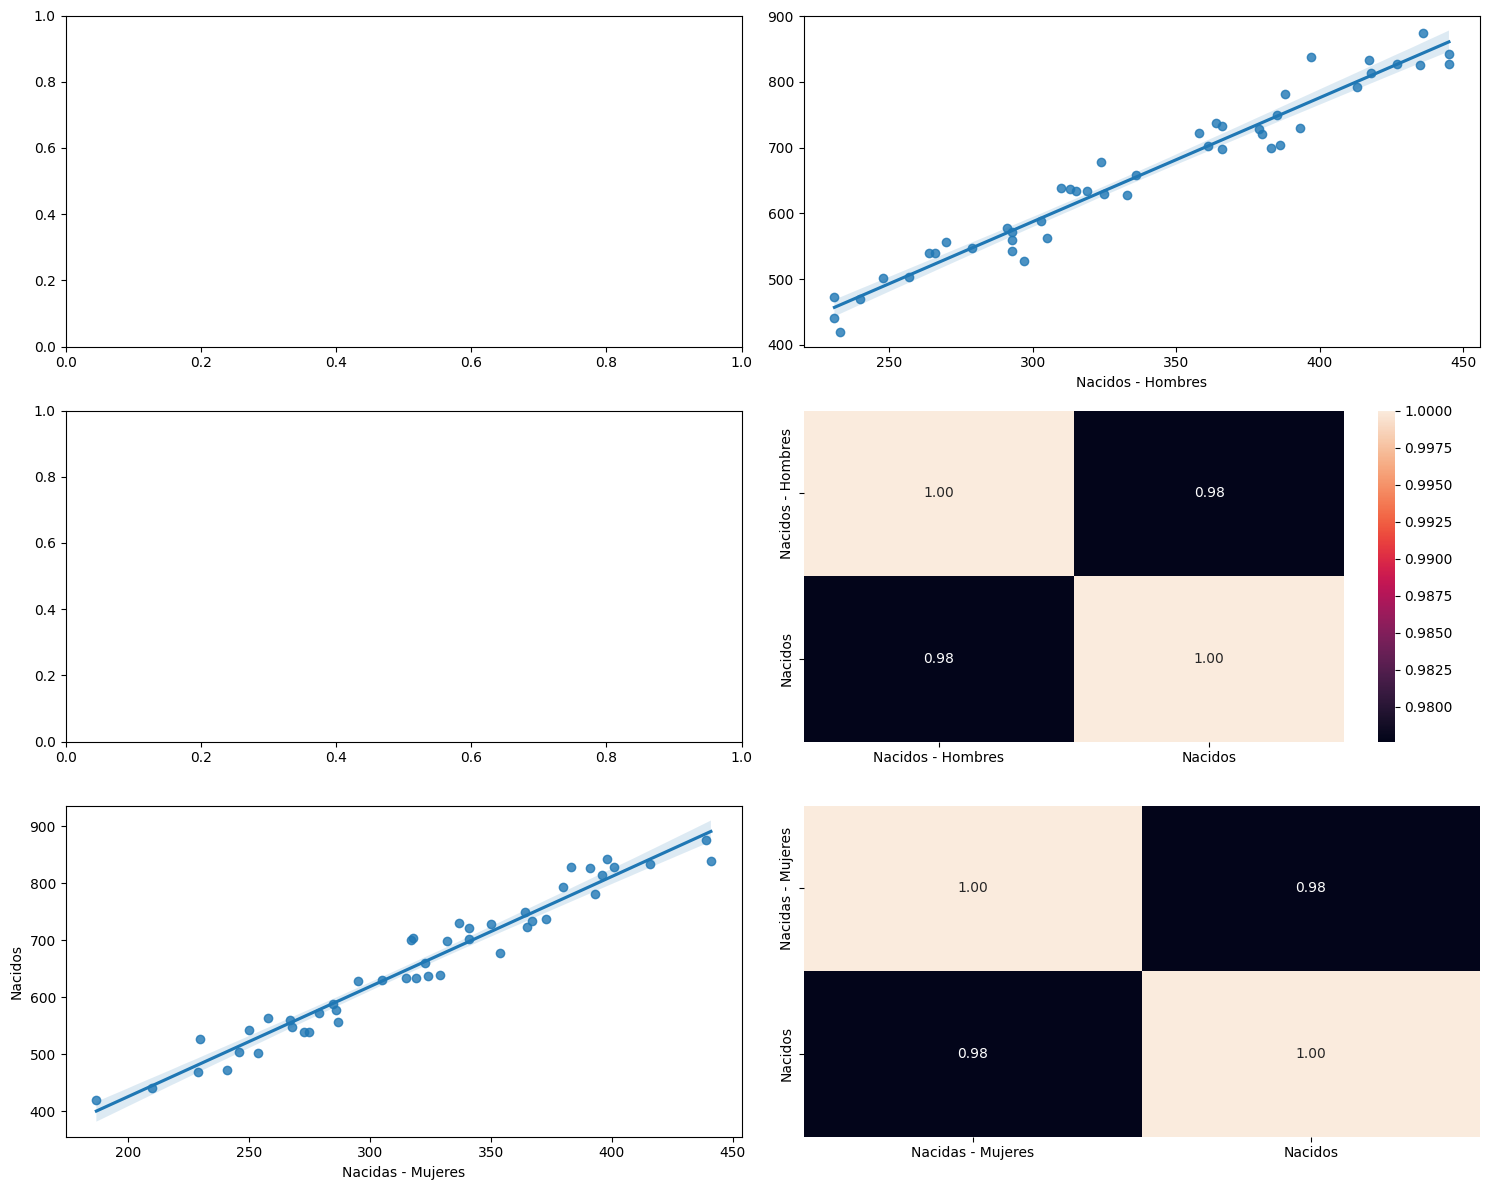

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df

fig, axis = plt.subplots(3, 2, figsize=(15, 12))


# Diagrama de dispersión y correlación para 'Muertes - Hombres' vs 'Muertes'
sns.regplot(ax=axis[0, 1], data=dataframe, x='Nacidos - Hombres', y='Nacidos').set(ylabel=None)
sns.heatmap(dataframe[['Nacidos - Hombres', 'Nacidos']].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Diagrama de dispersión y correlación para 'Muertes - Mujeres' vs 'Muertes'
sns.regplot(ax=axis[2, 0], data=dataframe, x='Nacidas - Mujeres', y='Nacidos')
sns.heatmap(dataframe[['Nacidas - Mujeres', 'Nacidos']].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()


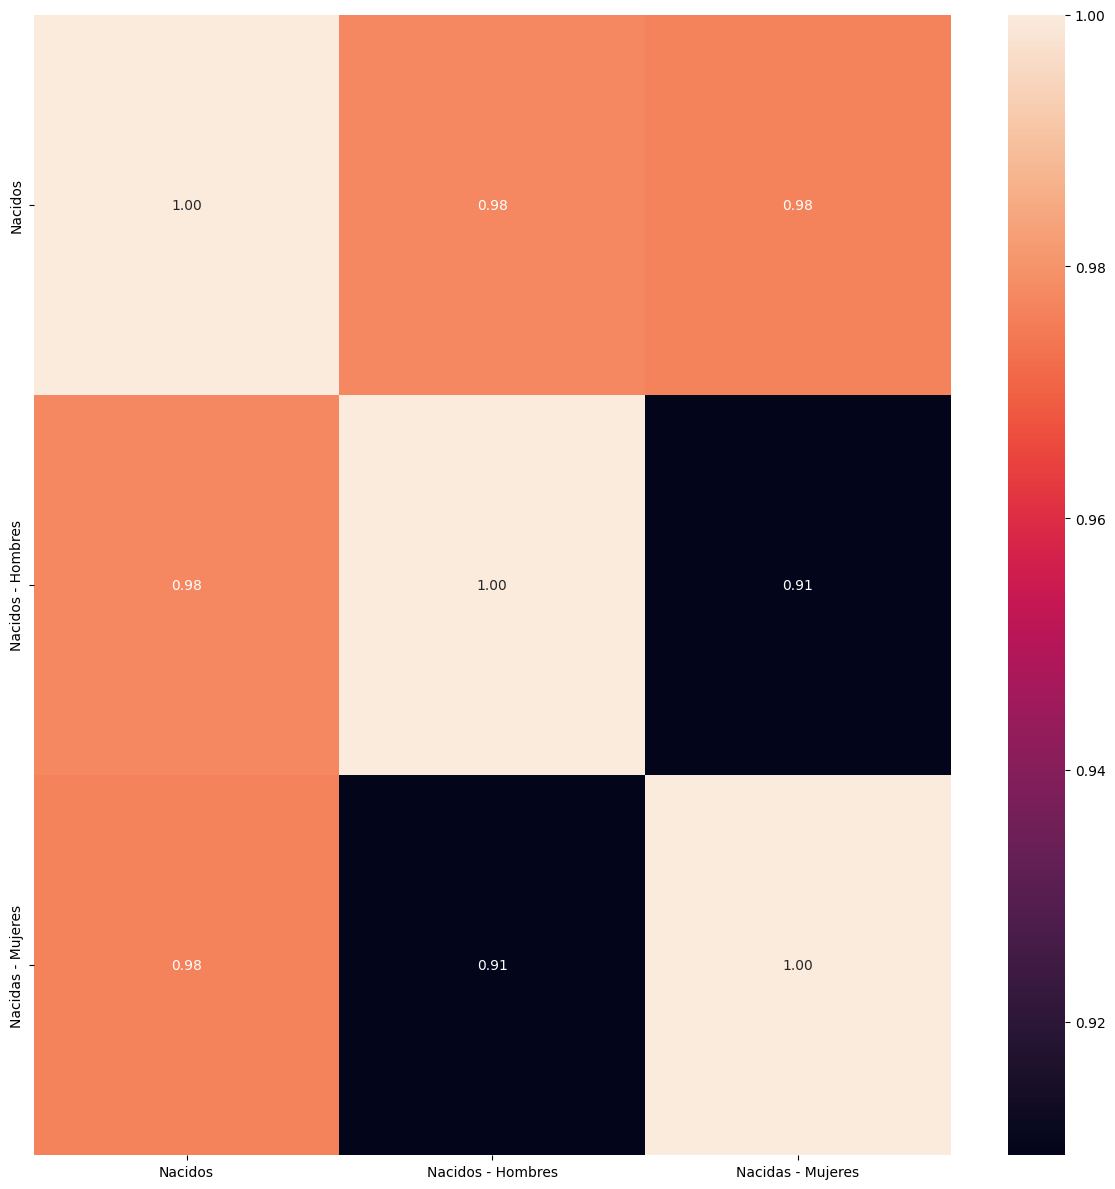

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df
numeric_variables = ['Nacidos', 'Nacidos - Hombres', 'Nacidas - Mujeres']

# Crear una figura de subplots con configuración de 1 fila y 1 columna
fig, axis = plt.subplots(figsize=(12, 12))

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = dataframe[numeric_variables].corr()

# Generar el heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=axis)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


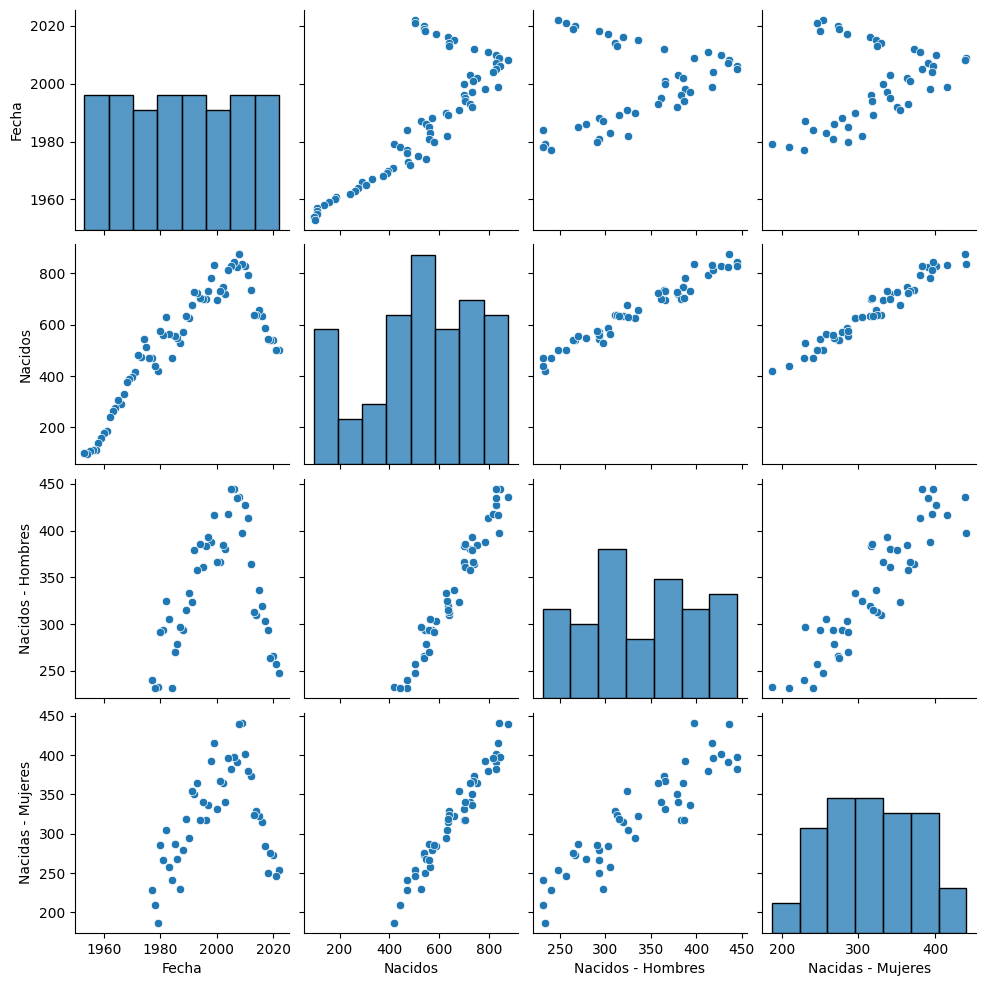

In [10]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [11]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de líneas interactivo
fig_line = px.line(dataframe, x='Fecha', y=dataframe.columns[1:], # Tomando las columnas desde la tercera en adelante
                   title='Comparación de todas los nacimientos a lo largo del tiempo')

# Mostrar el gráfico
fig_line.show()


In [12]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de barras apiladas con barmode='group'
fig_bar = px.bar(dataframe, x='Fecha', y=['Nacidos', 'Nacidos - Hombres', 'Nacidas - Mujeres'],
                 color_discrete_sequence=['blue', 'purple', 'orange'],
                 title='Distribución de nacimientos por Fecha',
                 labels={'value': 'Cantidad', 'variable': 'Tipo de sexo'},
                 height=500,
                 barmode='group')  # Utiliza 'group' para barras al lado de la otra

# Mostrar el gráfico
fig_bar.show()


In [13]:
# Guardar el gráfico como archivo HTML
fig_bar.write_html('natalidad_grafico_barras.html')

In [14]:
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Crear el gráfico de líneas
fig_line = px.line(dataframe, x='Fecha', y=['Nacidos', 'Nacidos - Hombres', 'Nacidas - Mujeres'],
                   color_discrete_sequence=['blue', 'purple', 'orange'],
                   title='Evolución de la Distribución de los nacimientos en el Tiempo',
                   labels={'value': 'Cantidad', 'variable': 'Tipo de Inmigrante'},
                   height=500)

# Mostrar el gráfico
fig_line.show()


In [15]:
import plotly.io as pio


# Guardar el gráfico como un archivo HTML
pio.write_html(fig_line, file='natalidad_grafico_lineas.html')

---

In [16]:
#Análisis de valores faltantes

dataframe.isnull().sum()

Fecha                 0
Nacidos               0
Nacidos - Hombres    24
Nacidas - Mujeres    24
dtype: int64

In [18]:
#Normalización


import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que 'dataframe' es tu DataFrame y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame

# Selecciona las variables numéricas
num_variables = ['Fecha', 'Nacidos', 'Nacidos - Hombres', 'Nacidas - Mujeres']

# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Aplica el escalamiento a las variables seleccionadas
norm_features = scaler.fit_transform(dataframe[num_variables])

# Crea un nuevo DataFrame con las variables escaladas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe.index, columns=num_variables)

# Muestra las primeras filas del DataFrame normalizado
dataframe_norm.head()

,Fecha,Nacidos,Nacidos - Hombres,Nacidas - Mujeres
0,1.707481,-0.135128,-1.417430,-1.078587
1,1.657989,-0.130532,-1.274409,-1.208810
2,1.608497,0.034931,-1.131388,-0.769307
3,1.559005,0.034931,-1.163170,-0.736751
4,1.509513,0.053316,-0.702324,-1.143698


In [19]:
#Escalado Mínimo-Máximo

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'dataframe' es tu DataFrame y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame

# Selecciona las variables numéricas
num_variables = ['Fecha', 'Nacidos', 'Nacidos - Hombres', 'Nacidas - Mujeres']

# Crea una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplica el escalado Mínimo-Máximo a las variables seleccionadas
scal_features = scaler.fit_transform(dataframe[num_variables])

# Crea un nuevo DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scal_features, index=dataframe.index, columns=num_variables)

# Muestra las primeras filas del DataFrame escalado
dataframe_scal.head()

,Fecha,Nacidos,Nacidos - Hombres,Nacidas - Mujeres
0,1.000000,0.521181,0.079439,0.263780
1,0.985507,0.522465,0.121495,0.232283
2,0.971014,0.568678,0.163551,0.338583
3,0.956522,0.568678,0.154206,0.346457
4,0.942029,0.573813,0.289720,0.248031


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import pandas as pd
import joblib

# Supongamos que 'dataframe_scal' es tu DataFrame escalado y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame escalado

# Elimina filas con valores NaN en cualquier columna
dataframe_scal = dataframe_scal.dropna()

# Selecciona las variables para X (características) y y (objetivo)
X = dataframe_scal[['Nacidos', 'Nacidos - Hombres', 'Nacidas - Mujeres']]
y = dataframe_scal['Fecha']  # Reemplaza 'TuVariableObjetivo' con la variable objetivo real

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guarda los conjuntos de entrenamiento y prueba como archivos CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Crea un modelo (en este caso, un modelo de regresión lineal)
model = LinearRegression()

# Entrena el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Guarda el modelo entrenado
joblib.dump(model, 'modelo_natalidad.joblib')

# Imprime el coeficiente y el intercepto del modelo (si es un modelo de regresión lineal)
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

# Muestra el rendimiento del modelo en el conjunto de prueba
print("Rendimiento del modelo en el conjunto de prueba:", model.score(X_test, y_test))

Coeficientes del modelo: [ 0.0751239  -0.11729775  0.32922533]
Intercepto del modelo: 0.4995753992260541
Rendimiento del modelo en el conjunto de prueba: 0.19753021727475584


In [28]:
from sklearn.model_selection import GridSearchCV

# Define el modelo de regresión lineal
model = LinearRegression()

# Define los parámetros que deseas ajustar
param_grid = {
    'fit_intercept': [True, False],  # Prueba con y sin intercepto
}

# Crea un objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)  # Puedes ajustar el número de folds en cv

# Realiza la búsqueda de cuadrícula en los conjuntos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprime el rendimiento del mejor modelo en el conjunto de prueba
print("Rendimiento del mejor modelo en el conjunto de prueba:", best_model.score(X_test, y_test))


Mejores hiperparámetros: {'fit_intercept': True}
Rendimiento del mejor modelo en el conjunto de prueba: 0.19753021727475584
